Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions \
Note 
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.

2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all Pokemons whose spawn rate is less than 5%

● Get all Pokemons that have less than 4 weaknesses

● Get all Pokemons that have no multipliers at all

● Get all Pokemons that do not have more than 2 evolutions

● Get all Pokemons whose spawn time is less than 300 seconds.

Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

● Get all Pokemon who have more than two types of capabilities



In [ ]:
# import urllib library
from urllib.request import urlopen
# import json library
import json  
#import datetime library
import datetime
import pandas as pd
import matplotlib.pyplot as plt

def readDataJSON(url_link):
  
  try:
    # store the response of URL
    response = urlopen(url_link)
  except Exception as e:
    print("Could not open link")  
  
  try:
    # storing the JSON response from url in data
    data_json = json.loads(response.read())
  except Exception as e:
    print("Could not read data from link")
  
  try:
    # convert the json response
    convertData(data_json)
  except Exception as e:
    print("Could not convert data")

# Function to convert Data from JSON into required format
def convertData(data):
  new_data = []
  data_columns = []
  for i in data['pokemon']:
    data_columns = i.keys()
    i['id'] = int(i['id'])
    i['num'] = int(i['num'])
    i['name'] = str(i['name'])
    i['img'] = str(i['img'])
    i['type'] = str(",".join(i['type']))
    i['height'] = float(i['height'].replace('m','').strip())
    i['weight'] = float(i['weight'].replace('kg','').strip())

    i['candy'] = str(i['candy'])
    i['candy_count'] = int(i.get('candy_count',0))
    i['egg'] = i['egg'].replace('km','').replace('Not in Eggs', '')
    i['spawn_chance'] = float(i['spawn_chance'])
    i['avg_spawns'] = int(i['avg_spawns'])
    i['spawn_time'] = datetime.datetime.strptime(i['spawn_time'].replace('N/A','00:00'), '%M:%S').time()
    if i['multipliers'] == None:
       i['multipliers'] = [] 
    else: 
      i['multipliers'] = [int(i) for i in i['multipliers']]
    
    i['weaknesses'] = [str(i) for i in i['weaknesses']]
    i['next_evolution'] = i.get('next_evolution',dict())
    i['prev_evolution'] = i.get('prev_evolution',dict())
    new_data.append([i['id'], i['num'], i['name'], i['img'], i['type'], i['height'], i['weight'], i['candy'], i['egg'], i['spawn_chance'], i['avg_spawns'], i['spawn_time'], i['multipliers'], i['weaknesses'],i['candy_count'],i['next_evolution'],i['prev_evolution']])

  df = pd.DataFrame(new_data, columns=data_columns)

  try:
    # Create Excel file with formatted data
    df.to_excel("pokemon.xlsx", index=False)
  except Exception as e:
    print("Could not save data in Excel.")

In [ ]:
readDataJSON("https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json")

In [ ]:
poke_data = pd.read_excel('pokemon.xlsx')

In [ ]:
poke_data.head()

,id,num,name,img,type,height,weight,candy,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,candy_count,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass,Poison",0.71,6.9,Bulbasaur Candy,2,0.690,69,00:20:00,[1],"['Fire', 'Ice', 'Flying', 'Psychic']",25,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",{}
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass,Poison",0.99,13.0,Bulbasaur Candy,NaN,0.042,4,00:07:00,"[1, 1]","['Fire', 'Ice', 'Flying', 'Psychic']",100,"[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass,Poison",2.01,100.0,Bulbasaur Candy,NaN,0.017,1,00:11:30,[],"['Fire', 'Ice', 'Flying', 'Psychic']",0,{},"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,2,0.253,25,00:08:45,[1],"['Water', 'Ground', 'Rock']",25,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",{}
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,NaN,0.012,1,00:19:00,[1],"['Water', 'Ground', 'Rock']",100,"[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [ ]:
# Get all Pokemons whose spawn rate is less than 5%
poke_spawn_rate_lt_5 = poke_data[poke_data['spawn_chance'] < 5]
poke_spawn_rate_lt_5

,id,num,name,img,type,height,weight,candy,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,candy_count,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass,Poison",0.71,6.9,Bulbasaur Candy,2,0.6900,69,00:20:00,[1],"['Fire', 'Ice', 'Flying', 'Psychic']",25,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",{}
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass,Poison",0.99,13.0,Bulbasaur Candy,NaN,0.0420,4,00:07:00,"[1, 1]","['Fire', 'Ice', 'Flying', 'Psychic']",100,"[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass,Poison",2.01,100.0,Bulbasaur Candy,NaN,0.0170,1,00:11:30,[],"['Fire', 'Ice', 'Flying', 'Psychic']",0,{},"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,2,0.2530,25,00:08:45,[1],"['Water', 'Ground', 'Rock']",25,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",{}
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,NaN,0.0120,1,00:19:00,[1],"['Water', 'Ground', 'Rock']",100,"[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80,3.3,Dratini Candy,10,0.3000,30,00:06:41,"[1, 1]","['Ice', 'Dragon', 'Fairy']",25,"[{'num': '148', 'name': 'Dragonair'}, {'num': ...",{}
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99,16.5,Dratini Candy,NaN,0.0200,2,00:11:57,[2],"['Ice', 'Dragon', 'Fairy']",100,"[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon,Flying",2.21,210.0,Dratini Candy,NaN,0.0011,0,00:23:38,[],"['Ice', 'Rock', 'Dragon', 'Fairy']",0,{},"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01,122.0,None,NaN,0.0000,0,00:00:00,[],"['Bug', 'Ghost', 'Dark']",0,{},{}


In [ ]:
# Get all Pokemons that have less than 4 weaknesses
poke_with_weak_lt_4 = poke_data[poke_data['weaknesses'].str.count(',') < 4]
poke_with_weak_lt_4 

,id,num,name,img,type,height,weight,candy,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,candy_count,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass,Poison",0.71,6.9,Bulbasaur Candy,2,0.6900,69,00:20:00,[1],"['Fire', 'Ice', 'Flying', 'Psychic']",25,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",{}
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass,Poison",0.99,13.0,Bulbasaur Candy,NaN,0.0420,4,00:07:00,"[1, 1]","['Fire', 'Ice', 'Flying', 'Psychic']",100,"[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass,Poison",2.01,100.0,Bulbasaur Candy,NaN,0.0170,1,00:11:30,[],"['Fire', 'Ice', 'Flying', 'Psychic']",0,{},"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,2,0.2530,25,00:08:45,[1],"['Water', 'Ground', 'Rock']",25,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",{}
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,NaN,0.0120,1,00:19:00,[1],"['Water', 'Ground', 'Rock']",100,"[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80,3.3,Dratini Candy,10,0.3000,30,00:06:41,"[1, 1]","['Ice', 'Dragon', 'Fairy']",25,"[{'num': '148', 'name': 'Dragonair'}, {'num': ...",{}
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99,16.5,Dratini Candy,NaN,0.0200,2,00:11:57,[2],"['Ice', 'Dragon', 'Fairy']",100,"[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon,Flying",2.21,210.0,Dratini Candy,NaN,0.0011,0,00:23:38,[],"['Ice', 'Rock', 'Dragon', 'Fairy']",0,{},"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01,122.0,None,NaN,0.0000,0,00:00:00,[],"['Bug', 'Ghost', 'Dark']",0,{},{}


In [ ]:
# Get all Pokemons that have no multipliers at all
poke_with_no_multipliers = poke_data[poke_data['multipliers'].str.len() < 3]
poke_with_no_multipliers

,id,num,name,img,type,height,weight,candy,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,candy_count,next_evolution,prev_evolution
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass,Poison",2.01,100.0,Bulbasaur Candy,NaN,0.0170,1,00:11:30,[],"['Fire', 'Ice', 'Flying', 'Psychic']",0,{},"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire,Flying",1.70,90.5,Charmander Candy,NaN,0.0031,0,00:13:34,[],"['Water', 'Electric', 'Rock']",0,{},"[{'num': '004', 'name': 'Charmander'}, {'num':..."
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,Water,1.60,85.5,Squirtle Candy,NaN,0.0067,0,00:00:06,[],"['Electric', 'Grass']",0,{},"[{'num': '007', 'name': 'Squirtle'}, {'num': '..."
11,12,12,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"Bug,Flying",1.09,32.0,Caterpie Candy,NaN,0.0220,2,00:05:23,[],"['Fire', 'Electric', 'Ice', 'Flying', 'Rock']",0,{},"[{'num': '010', 'name': 'Caterpie'}, {'num': '..."
14,15,15,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"Bug,Poison",0.99,29.5,Weedle Candy,NaN,0.0510,5,00:04:50,[],"['Fire', 'Flying', 'Psychic', 'Rock']",0,{},"[{'num': '013', 'name': 'Weedle'}, {'num': '01..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"Electric,Flying",1.60,52.6,None,NaN,0.0000,0,00:00:00,[],"['Ice', 'Rock']",0,{},{}
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire,Flying",2.01,60.0,None,NaN,0.0000,0,00:00:00,[],"['Water', 'Electric', 'Rock']",0,{},{}
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon,Flying",2.21,210.0,Dratini Candy,NaN,0.0011,0,00:23:38,[],"['Ice', 'Rock', 'Dragon', 'Fairy']",0,{},"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01,122.0,None,NaN,0.0000,0,00:00:00,[],"['Bug', 'Ghost', 'Dark']",0,{},{}


In [ ]:
# Get all Pokemons that do not have more than 2 evolutions
poke_with_lt_2_evol = poke_data[poke_data['next_evolution'].str.count(',') < 4]
poke_with_lt_2_evol

,id,num,name,img,type,height,weight,candy,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,candy_count,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass,Poison",0.71,6.9,Bulbasaur Candy,2,0.6900,69,00:20:00,[1],"['Fire', 'Ice', 'Flying', 'Psychic']",25,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",{}
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass,Poison",0.99,13.0,Bulbasaur Candy,NaN,0.0420,4,00:07:00,"[1, 1]","['Fire', 'Ice', 'Flying', 'Psychic']",100,"[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass,Poison",2.01,100.0,Bulbasaur Candy,NaN,0.0170,1,00:11:30,[],"['Fire', 'Ice', 'Flying', 'Psychic']",0,{},"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,2,0.2530,25,00:08:45,[1],"['Water', 'Ground', 'Rock']",25,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",{}
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,NaN,0.0120,1,00:19:00,[1],"['Water', 'Ground', 'Rock']",100,"[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80,3.3,Dratini Candy,10,0.3000,30,00:06:41,"[1, 1]","['Ice', 'Dragon', 'Fairy']",25,"[{'num': '148', 'name': 'Dragonair'}, {'num': ...",{}
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99,16.5,Dratini Candy,NaN,0.0200,2,00:11:57,[2],"['Ice', 'Dragon', 'Fairy']",100,"[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon,Flying",2.21,210.0,Dratini Candy,NaN,0.0011,0,00:23:38,[],"['Ice', 'Rock', 'Dragon', 'Fairy']",0,{},"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01,122.0,None,NaN,0.0000,0,00:00:00,[],"['Bug', 'Ghost', 'Dark']",0,{},{}


In [ ]:
# Get all Pokemons whose spawn time is less than 300 seconds
poke_data['spawn_time_in_sec'] =  (pd.to_datetime(poke_data['spawn_time']).dt.minute * 60) + \
                                  (pd.to_datetime(poke_data['spawn_time']).dt.second)

poke_spawn_time_lt_300 = poke_data[poke_data['spawn_time_in_sec'] < 300]
poke_spawn_time_lt_300

,id,num,name,img,type,height,weight,candy,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,candy_count,next_evolution,prev_evolution,spawn_time_in_sec
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,Water,0.51,9.0,Squirtle Candy,2,0.5800,58,00:04:25,[2],"['Electric', 'Grass']",25,"[{'num': '008', 'name': 'Wartortle'}, {'num': ...",{},265
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,Water,1.60,85.5,Squirtle Candy,NaN,0.0067,0,00:00:06,[],"['Electric', 'Grass']",0,{},"[{'num': '007', 'name': 'Squirtle'}, {'num': '...",6
10,11,11,Metapod,http://www.serebii.net/pokemongo/pokemon/011.png,Bug,0.71,9.9,Caterpie Candy,NaN,0.1870,18,00:02:11,"[3, 3]","['Fire', 'Flying', 'Rock']",50,"[{'num': '012', 'name': 'Butterfree'}]","[{'num': '010', 'name': 'Caterpie'}]",131
12,13,13,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,"Bug,Poison",0.30,3.2,Weedle Candy,2,7.1200,712,00:02:21,"[1, 1]","['Fire', 'Flying', 'Psychic', 'Rock']",12,"[{'num': '014', 'name': 'Kakuna'}, {'num': '01...",{},141
13,14,14,Kakuna,http://www.serebii.net/pokemongo/pokemon/014.png,"Bug,Poison",0.61,10.0,Weedle Candy,NaN,0.4400,44,00:02:30,"[3, 3]","['Fire', 'Flying', 'Psychic', 'Rock']",50,"[{'num': '015', 'name': 'Beedrill'}]","[{'num': '013', 'name': 'Weedle'}]",150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,144,144,Articuno,http://www.serebii.net/pokemongo/pokemon/144.png,"Ice,Flying",1.70,55.4,None,NaN,0.0000,0,00:00:00,[],"['Fire', 'Electric', 'Rock', 'Steel']",0,{},{},0
144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"Electric,Flying",1.60,52.6,None,NaN,0.0000,0,00:00:00,[],"['Ice', 'Rock']",0,{},{},0
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire,Flying",2.01,60.0,None,NaN,0.0000,0,00:00:00,[],"['Water', 'Electric', 'Rock']",0,{},{},0
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01,122.0,None,NaN,0.0000,0,00:00:00,[],"['Bug', 'Ghost', 'Dark']",0,{},{},0


In [ ]:
# Get all Pokemon who have more than two types of capabilities
poke_gt_2_types = poke_data[poke_data['type'].str.count(',') > 1]
poke_gt_2_types

,id,num,name,img,type,height,weight,candy,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,candy_count,next_evolution,prev_evolution,spawn_time_in_sec


In [ ]:
def createBarPlot(x,y,x_label, y_label, bar_title):
  plt.figure(figsize=(20, 8))
  plt.bar(x, y)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(bar_title)
  plt.xticks(rotation=90)
  plt.show()

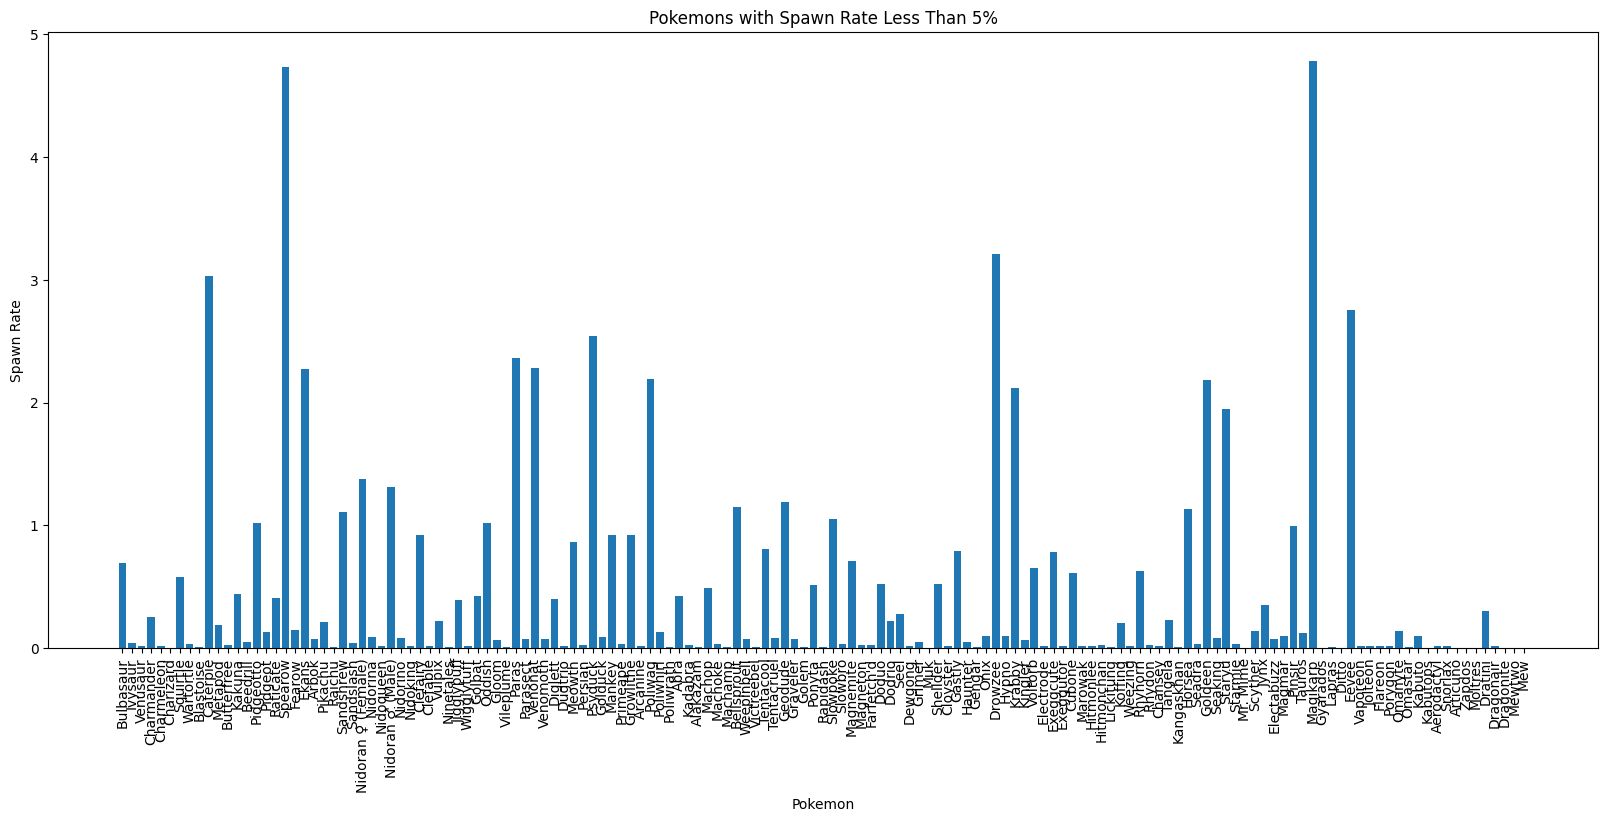

In [ ]:
# Bar plot for spawn rate less than 5%
x = poke_spawn_rate_lt_5['name']
y = poke_spawn_rate_lt_5['spawn_chance']
x_label = 'Pokemon'
y_label = 'Spawn Rate'
bar_title = 'Pokemons with Spawn Rate Less Than 5%'
createBarPlot(x, y, x_label, y_label, bar_title)

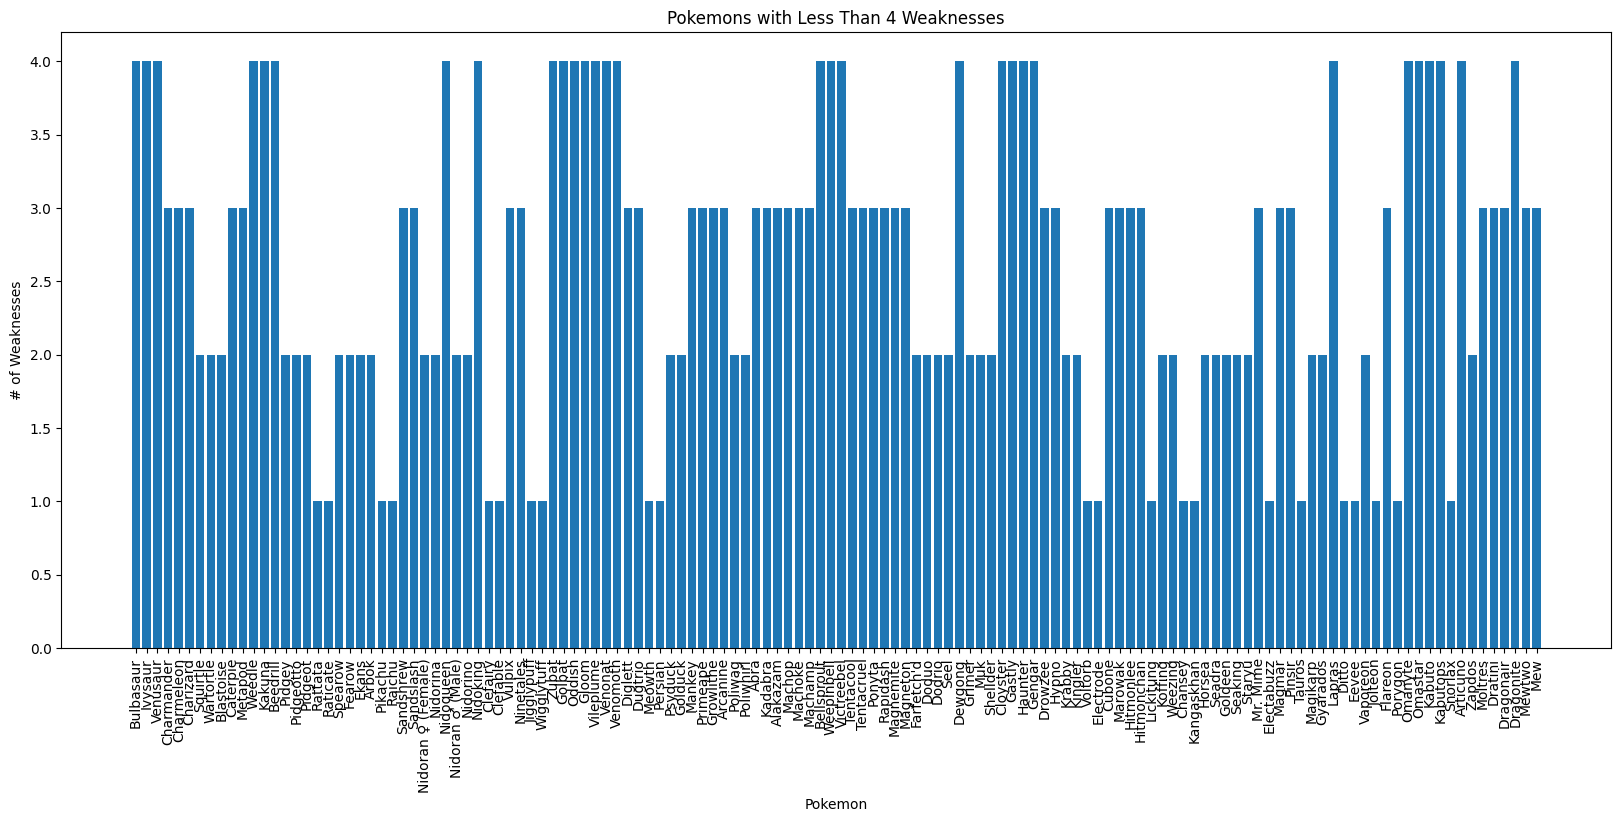

In [ ]:
# Bar plot for Pokemons with less than 4 weaknesses
x = poke_with_weak_lt_4['name']
y = poke_with_weak_lt_4['weaknesses'].str.count(',') + 1
x_label = 'Pokemon'
y_label = '# of Weaknesses'
bar_title = 'Pokemons with Less Than 4 Weaknesses'
createBarPlot(x, y, x_label, y_label, bar_title)

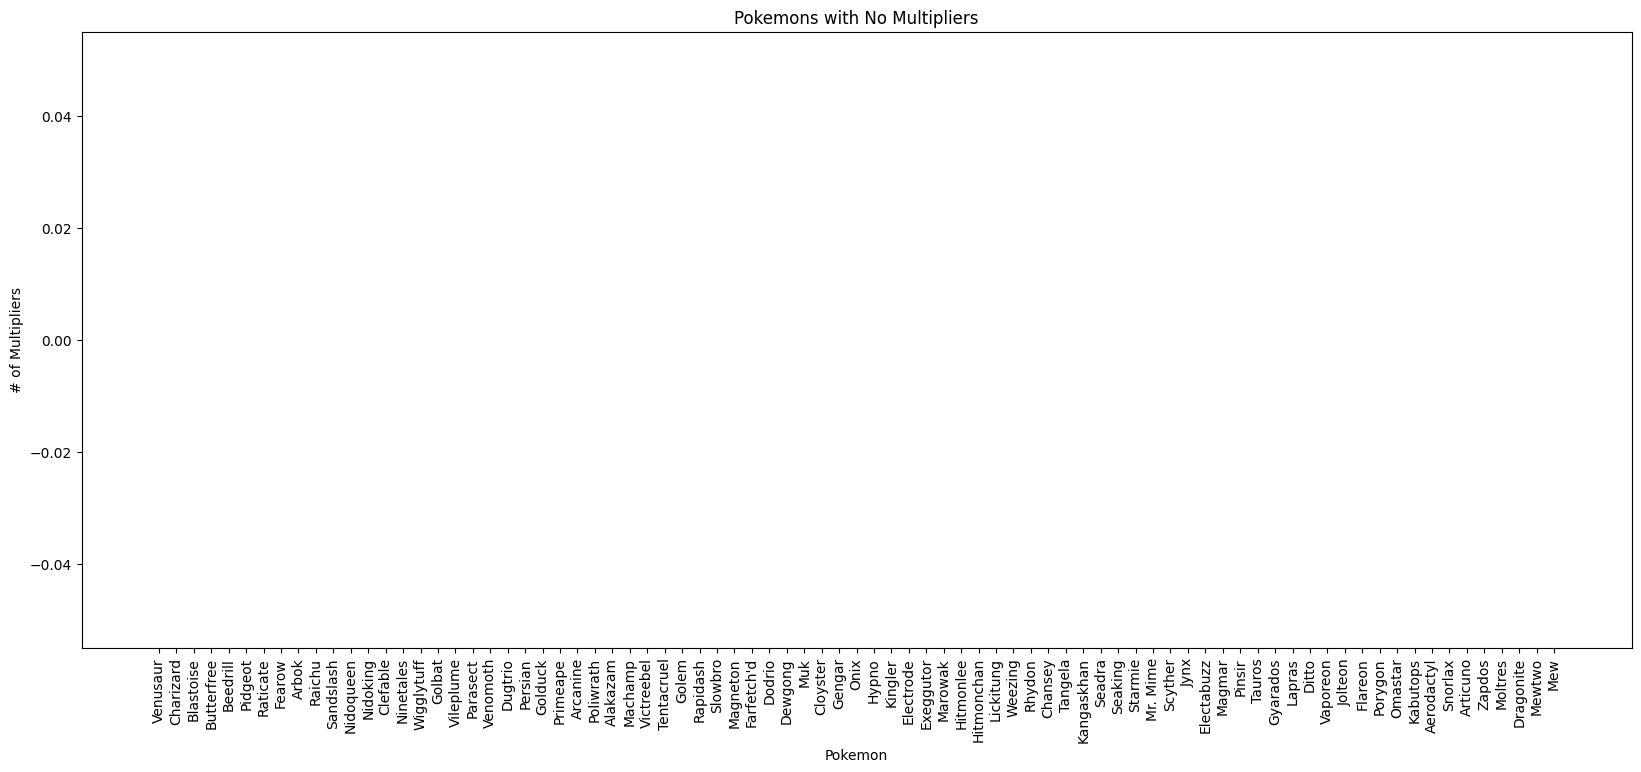

In [ ]:
# Bar plot for Pokemons with no multipliers
x = poke_with_no_multipliers['name']
y = poke_with_no_multipliers['multipliers'].str.count(',')
x_label = 'Pokemon'
y_label = '# of Multipliers'
bar_title = 'Pokemons with No Multipliers'
createBarPlot(x, y, x_label, y_label, bar_title)

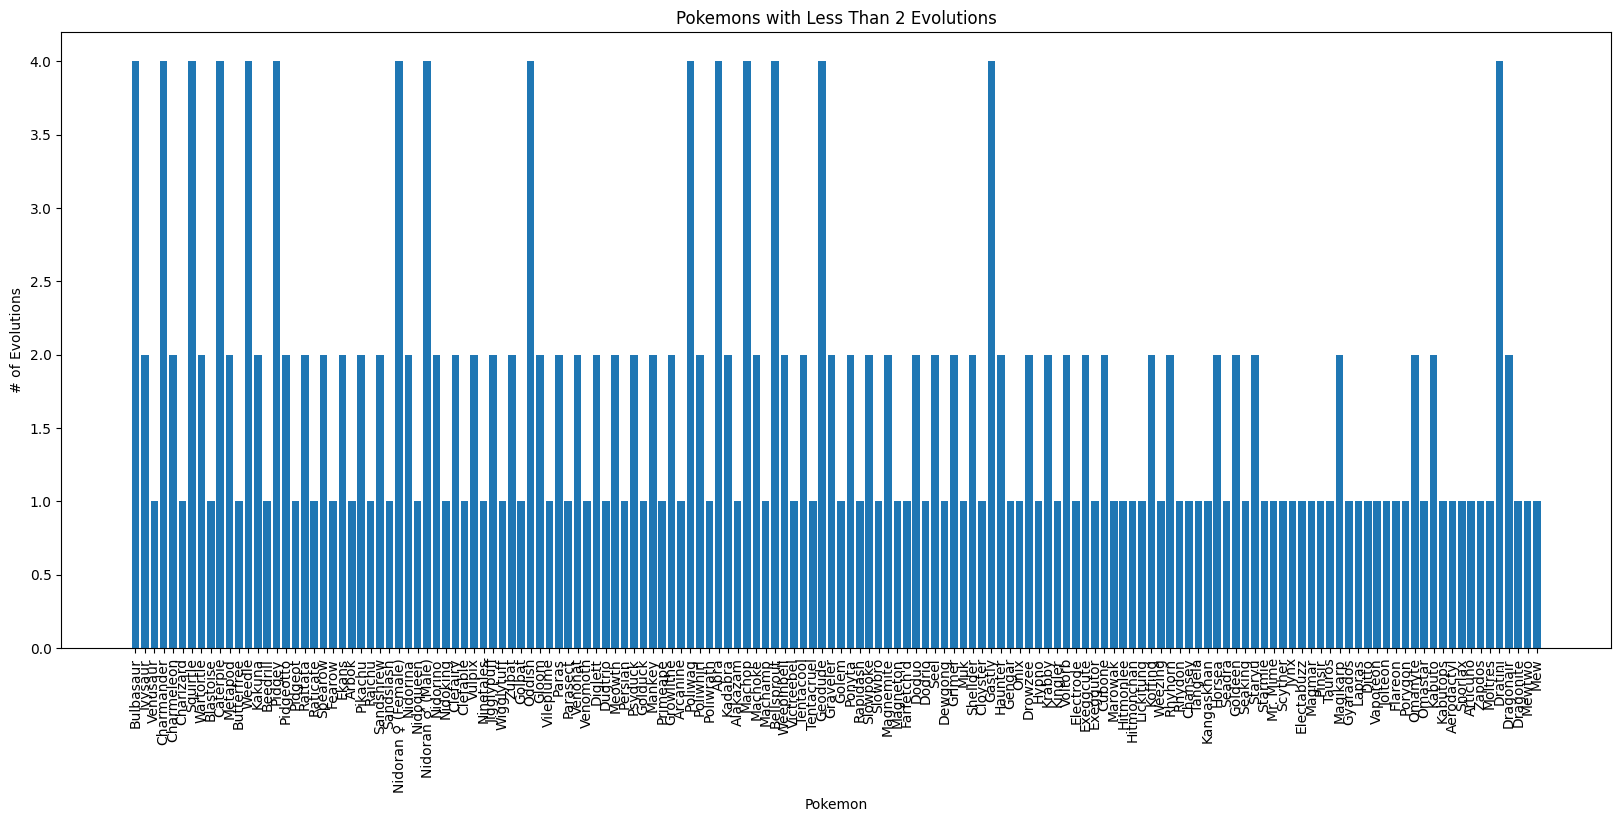

In [ ]:
# Bar plot for Pokemons with less than 2 evolutions
x = poke_with_lt_2_evol['name']
y = poke_with_lt_2_evol['next_evolution'].str.count(',') + 1
x_label = 'Pokemon'
y_label = '# of Evolutions'
bar_title = 'Pokemons with Less Than 2 Evolutions'
createBarPlot(x, y, x_label, y_label, bar_title)


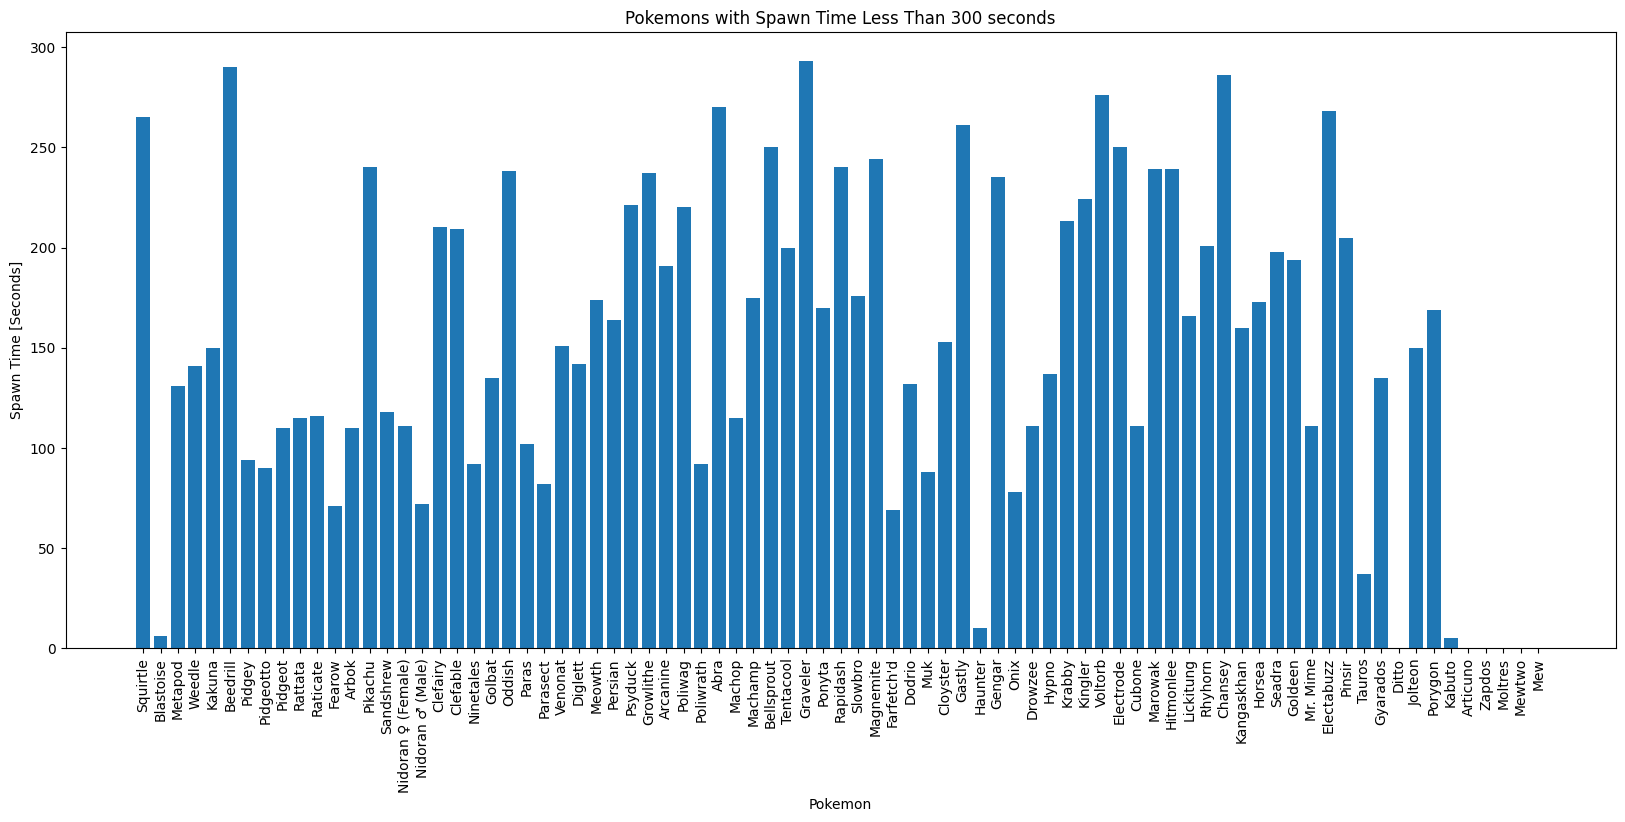

In [ ]:
# Bar plot for Pokemons with spawn time less than 300 seconds

x = poke_spawn_time_lt_300['name']
y = poke_spawn_time_lt_300['spawn_time_in_sec']
x_label = 'Pokemon'
y_label = 'Spawn Time [Seconds]'
bar_title = 'Pokemons with Spawn Time Less Than 300 seconds'
createBarPlot(x, y, x_label, y_label, bar_title)


In [ ]:
# Create a bar plot for the count of Pokémon with multiple abilities
plt.bar(['Pokémon'], [len(pokemon_list)])
plt.xlabel('Number of Abilities')
plt.ylabel('Count')
plt.title('Pokémon with Multiple Abilities')
plt.show()

x = poke_gt_2_types['name']
y = poke_gt_2_types['spawn_time_in_sec']
x_label = 'Pokemon'
y_label = 'Spawn Time [Seconds]'
bar_title = 'Pokemons with Spawn Time Less Than 300 seconds'
createBarPlot(x, y, x_label, y_label, bar_title)




In [ ]:
poke_data['type'] = df['type'].apply(lambda x: len(x.split(', ')))

In [ ]:
poke_data[['name','type']]

,name,type
0,Bulbasaur,"Grass,Poison"
1,Ivysaur,"Grass,Poison"
2,Venusaur,"Grass,Poison"
3,Charmander,Fire
4,Charmeleon,Fire
...,...,...
146,Dratini,Dragon
147,Dragonair,Dragon
148,Dragonite,"Dragon,Flying"
149,Mewtwo,Psychic
